In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [25]:
data = pd.read_csv('/content/archive (22).zip')

In [26]:
data

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [28]:
print("Total missing values:", data.isna().sum().sum())

Total missing values: 10


In [29]:
print("Columns with missing values:", data.columns[data.isna().sum() > 0].values)

Columns with missing values: ['engine_capacity']


In [30]:
data['engine_capacity'].dtype

dtype('float64')

In [31]:
data['engine_capacity'] = data['engine_capacity'].fillna(data['engine_capacity'].mean())

print("Total missing values:", data.isna().sum().sum())

Total missing values: 0


In [9]:
##Encoding Features

In [32]:
data

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [33]:
for column in data.columns:
    if data.dtypes[column] == 'bool':
        data[column] = data[column].astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
{column: len(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'body_type': 12,
 'color': 12,
 'drivetrain': 3,
 'engine_fuel': 6,
 'engine_type': 3,
 'location_region': 6,
 'manufacturer_name': 55,
 'model_name': 1118,
 'state': 3,
 'transmission': 2}

In [18]:
#model_name has too many unique values, so let's drop that feature.

In [35]:
data = data.drop('model_name', axis=1)

In [36]:
##transmission has only two unique values, so we can encode it as a binary feature.

In [37]:
data['transmission'].unique()

array(['automatic', 'mechanical'], dtype=object)

In [38]:
transmission_mapping = {'automatic': 0, 'mechanical': 1}

data['transmission'] = data['transmission'].replace(transmission_mapping)

In [39]:
##All the remaining features can be one-hot encoded.
##We will not encode engine_type, as that is our label column.

In [40]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [41]:


onehot_columns = [
    'manufacturer_name',
    'color',
    'engine_fuel',
    'body_type',
    'state',
    'drivetrain',
    'location_region'
]

onehot_prefixes = [
    'm',
    'c',
    'e',
    'b',
    's',
    'd',
    'l'
]

data = onehot_encode(
    data,
    columns=onehot_columns,
    prefixes=onehot_prefixes)

In [42]:
print("Remaining non-numeric columns:", (data.dtypes == 'object').sum())

Remaining non-numeric columns: 1


**Encoding Labels**

In [43]:
data['engine_type'].unique()

array(['gasoline', 'diesel', 'electric'], dtype=object)

In [44]:
label_mapping = {
    'gasoline': 0,
    'diesel': 1,
    'electric': 2
}

data['engine_type'] = data['engine_type'].replace(label_mapping)

In [45]:
print("Remaining non-numeric columns:", (data.dtypes == 'object').sum())

Remaining non-numeric columns: 0


*Visualizing Correlations**

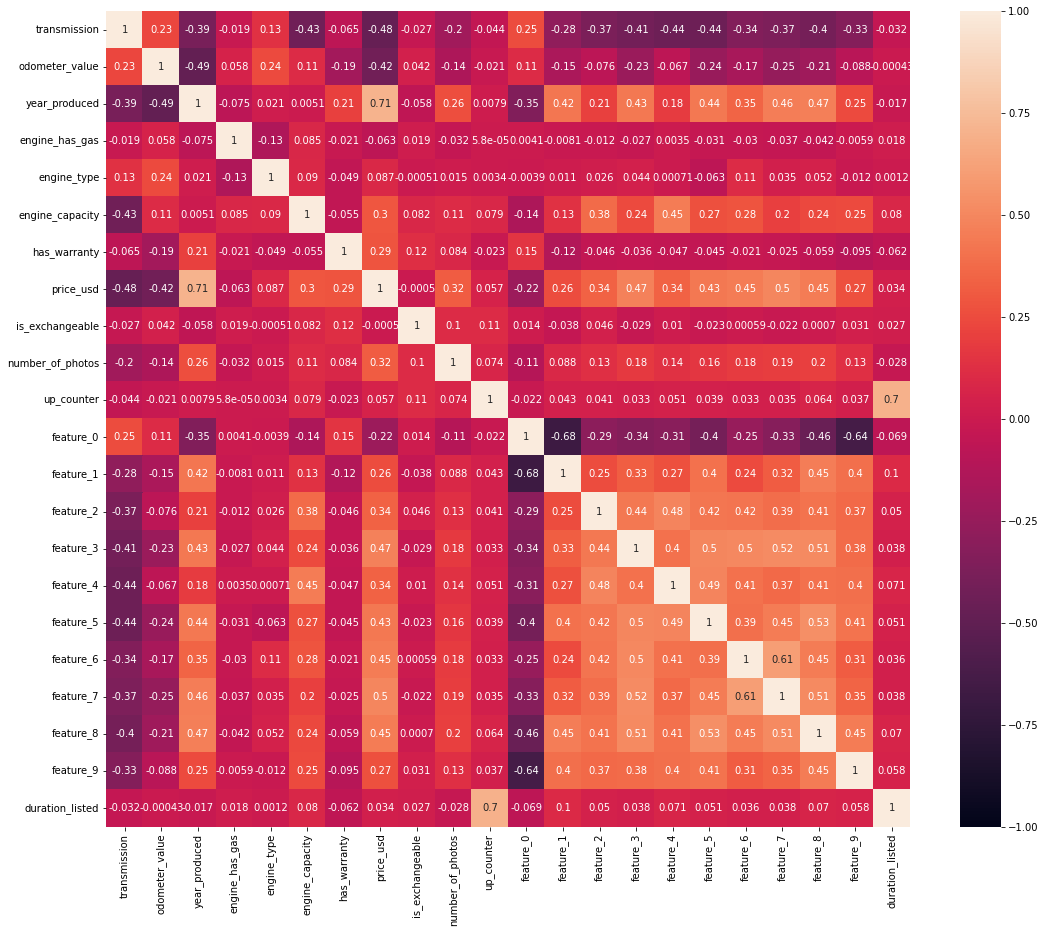

In [46]:
corr = data.loc[:, 'transmission':'duration_listed'].corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='rocket')
plt.show()

**Splitting/Scaling**

In [47]:
y = data['engine_type'].copy()
X = data.drop('engine_type', axis=1).copy()

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

**Modeling**

In [49]:
X.shape

(38531, 118)

In [50]:
inputs = tf.keras.Input(shape=(118,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
675/675 [==============================] - 2s 2ms/step - loss: 0.0674 - accuracy: 0.9788 - val_loss: 8.0666e-04 - val_accuracy: 0.9998
Epoch 2/100
675/675 [==============================] - 1s 1ms/step - loss: 3.1745e-04 - accuracy: 1.0000 - val_loss: 2.2374e-04 - val_accuracy: 1.0000
Epoch 3/100
675/675 [==============================] - 1s 1ms/step - loss: 9.1671e-05 - accuracy: 1.0000 - val_loss: 1.1734e-04 - val_accuracy: 1.0000
Epoch 4/100
675/675 [==============================] - 1s 1ms/step - loss: 4.4367e-05 - accuracy: 1.0000 - val_loss: 7.2009e-05 - val_accuracy: 1.0000
Epoch 5/100
675/675 [==============================] - 1s 1ms/step - loss: 2.4606e-05 - accuracy: 1.0000 - val_loss: 4.6879e-05 - val_accuracy: 1.0000
Epoch 6/100
675/675 [==============================] - 1s 1ms/step - loss: 1.4677e-05 - accuracy: 1.0000 - val_loss: 3.2495e-05 - val_accuracy: 1.0000
Epoch 7/100
675/675 [==============================] - 1s 1ms/step - loss: 9.1750e-06 - accuracy: 

In [52]:
model.evaluate(X_test, y_test)

362/362 [==============================] - 1s 2ms/step - loss: 9.5935e-05 - accuracy: 0.9999


[9.593481809133664e-05, 0.9999135136604309]